# Getting started with Bruges

This notebook accompanies [a blog post on agilegeoscience.com](http://www.agilegeoscience.com/blog/). 

You need to install Bruges to run this notebook. You can clone the repository on GitHub or if you have pip installed, in a terminal you can do,

    pip install bruges

## AVO Calculations

In [1]:
import bruges as b

|  | Vp [m/s] | Vs [m/s] | Density [kg/m3] |  
|-------------|----------|----------|----------|
| upper layer | 3300 | 1500 | 2400 |
| lower layer | 3050 | 1400 | 2075 |

In [2]:
# Upper layer rock properties
vp1 = 3300.0
vs1 = 1500.0
rho1 = 2400.0

# Lower layer rock properties
vp2 = 3050.0
vs2 = 1400.0
rho2 = 2075.0

In [3]:
rc_0 = b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=0)
rc_0

-0.11199577706417983

In [4]:
rc_30 = b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=30)
rc_30

-0.096520698009549363

We can also get the individual terms of Shuey's linear approximation:

In [5]:
rc_terms = b.reflection.shuey2(vp1, vs1, rho1, vp2, vs2, rho2, theta1=30, terms=True)
rc_terms

(-0.11199577706417983, 0.019688936025916742)

The second term is the product of gradient and $sin^2 \theta$. So we can compute the gradient from this:

In [6]:
import numpy as np

intercept = rc_terms[0]
gradient = rc_terms[1] / np.sin(np.radians(30))**2
intercept, gradient

(-0.11199577706417983, 0.07875574410366698)

We can pass in a list of angles,

In [7]:
rc_list = b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=[0,10,20,30])
rc_list

array([-0.11199578, -0.10982911, -0.10398651, -0.0965207 ])

Create an array of angles from 0 to 70, incremented by 1,

In [8]:
theta_range = np.arange(0, 70)

Create some variables for our data so we don't have to type so much

In [9]:
rc_range = b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta_range)

Compare the two-term Aki-Richards approximation with the full Zoeprittz equation for a interface between two rocks:

In [10]:
rc_z = b.reflection.zoeppritz(vp1, vs1, rho1, vp2, vs2, rho2, theta_range)

Put all this data on an AVO plot:

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Python/2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


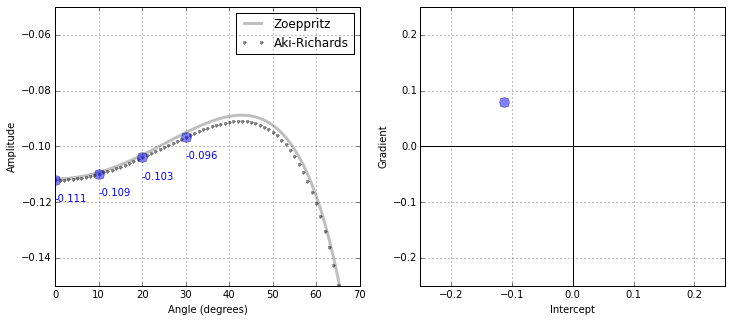

In [12]:
font = {'family' : 'monospace',
        'color'  : 'blue',
        'weight' : 'normal',
        'size'   : 14}
box = dict(facecolor='white', edgecolor='white', alpha=0.5)
nsz = 10

fig = plt.figure(figsize=(12,5))

# AVO plot
ax1 = fig.add_subplot(121)
ax1.plot(theta_range, rc_z, 'k', lw=3, alpha=0.25, label='Zoeppritz')
ax1.plot(theta_range, rc_range, 'k.', lw=3, alpha=0.5, label='Aki-Richards')

# We'll also add the four angles...
ax1.plot([0,10,20,30], rc_list, 'bo', ms=10, alpha = 0.5)

# Putting some annotations on the plot.
ax1.text(0,-0.11699578, '-0.111', ha='left', va='top', fontdict={'size': nsz, 'color': 'blue'})
ax1.text(10,-0.1148291, '-0.109', ha='left', va='top', fontdict={'size': nsz, 'color': 'blue'})
ax1.text(20,-0.1089865, '-0.103', ha='left', va='top', fontdict={'size': nsz, 'color': 'blue'})
ax1.text(30,-0.1015207, '-0.096', ha='left', va='top', fontdict={'size': nsz, 'color': 'blue'})
ax1.legend()
ax1.set_ylim((-0.15, -0.05))
ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Amplitude')
ax1.grid()

# Intercept-Gradient crossplot.
ax2 = fig.add_subplot(122)
ax2.plot(intercept, gradient, 'bo', ms=10, alpha = 0.5)

# Put spines for x and y axis.
ax2.axvline(0, color='k')
ax2.axhline(0, color='k')

# Set square axes limits.
mx = 0.25
ax2.set_xlim((-mx, mx))
ax2.set_ylim((-mx, mx))

# Label the axes and add gridlines.
ax2.set_xlabel('Intercept')
ax2.set_ylabel('Gradient')
ax2.grid()

fig.show()

## Elastic moduli calculations

Say I want to compute the Lamé parameters &#955; and &#181;, from V<sub>P</sub>, V<sub>S</sub>, and Density. As long as my inputs are in SI units, I can insert these values directly:

|  | Vp [m/s] | Vs [m/s] | Density [kg/m3] |
|-------------|----------|----------|----------|
| upper layer | 3300 | 1500 | 2400 |
| lower layer | 3050 | 1400 | 2075 |

In [13]:
# Upper layer only
b.rockphysics.lam(vp1, vs1, rho1), b.rockphysics.mu(vp1, vs1, rho1)

(15336000000.0, 5400000000.0)

We can print all the values in terms of GPa ($\times 10^9$ Pa)

In [14]:
print('Upper layer')
print('lambda [GPa]: {:.2f}'.format(b.rockphysics.lam(vp1, vs1, rho1) / 1e9))
print('    mu [GPa]: {:.2f}'.format(b.rockphysics.mu(vp1, vs1, rho1) / 1e9))
print('\nLower layer')
print('lambda [GPa]: {:.2f}'.format(b.rockphysics.lam(vp2, vs2, rho2) / 1e9))
print('    mu [GPa]: {:.2f}'.format(b.rockphysics.mu(vp2, vs2, rho2) / 1e9))

Upper layer
lambda [GPa]: 15.34
    mu [GPa]: 5.40

Lower layer
lambda [GPa]: 11.17
    mu [GPa]: 4.07


## Rock property analysis and crossplotting

In [15]:
from striplog import Well

(You might need to install Striplog in order to load well log data from an LAS file. However you could use your own data 

In [16]:
fname = 'data/P-132_synth.las'
well = Well(fname)

# cropp the log to a first and last sample
first = 1232 
last = 26000 

z = well.data['DEPT'][first:last]
dt = well.data['Sonic_despiked'][first:last]
rho = well.data['RHOB_despiked'][first:last]
tt = well.data['two-waytime'][first:last]

In [17]:
vp =  1e6 / (3.28084 * dt)        # SI units
vs = (vp - 1360)/1.16             # SI units
rho *= 1000      # SI units

In [18]:
lmlog = b.rockphysics.lam(vp, vs, rho)
mulog = b.rockphysics.mu(vp, vs, rho)

/usr/local/lib/python2.7/site-packages/bruges/rockphysics/moduli.py:202: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if None not in (vp, vs, rho):
/usr/local/lib/python2.7/site-packages/bruges/rockphysics/moduli.py:163: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if None not in (vs, rho):


Create a crossplot:

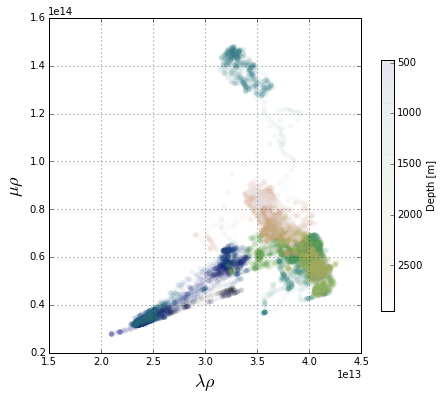

In [19]:
plt.figure(figsize=(7,6))
plt.scatter(lmlog*rho, mulog*rho, s=30, c=z, cmap="gist_earth",
            edgecolor='none',  # marker edge color
            alpha = 0.05)

# Give the plot a colorbar.
cb = plt.colorbar(shrink=0.75)
cb.ax.invert_yaxis()  # put shallow colors at the top
cb.set_ticks([500,1000,1500,2000,2500,3000])
cb.set_label("Depth [m]")

# Give the plot some annotation.
plt.xlabel(r'$\lambda \rho$', size=18)
plt.ylabel(r'$\mu \rho$', size=18)
plt.grid()

## Anisotropy calculations and Backus averaging

In [20]:
lb = 60       # Backus averaging length in metres.
dz = 0.1524   # Sample interval of the log in metres.

In [21]:
vp0, vs0 = b.rockphysics.backus(vp, vs, rho, lb, dz)

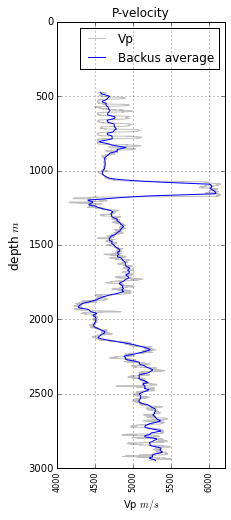

In [22]:
fs = 8  # control the fontsize

fig = plt.figure(figsize=(3,8))

ax1 = plt.subplot(111)
ax1.plot(vp, z, 'k', alpha=0.25, label='Vp')
ax1.plot(vp0, z, 'b', label='Backus average')

# Do some plot annotations
ax1.set_title('P-velocity')
ax1.set_ylabel(r'depth $m$', size=12)
ax1.invert_yaxis()
ax1.set_xlim((4000,6200))
ax1.set_xlabel(r'Vp $m/s$')
ax1.grid()
ax1.legend()
labels = ax1.get_xticklabels() 
for label in labels: 
    label.set_rotation(90) 
    label.set_fontsize(fs)

fig.show()

<hr />
<img src="https://avatars1.githubusercontent.com/u/1692321?v=3&s=200" style="float:right;" width="40px" /><p style="color:gray; float:right;">© 2015 <a href="http://www.agilegeoscience.com/">Agile Geoscience</a> — <a href="https://creativecommons.org/licenses/by/4.0/">CC-BY</a> — Have fun!&nbsp;&nbsp;&nbsp;</p>